In [11]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score,
                             roc_auc_score, roc_curve)

import warnings
warnings.filterwarnings("ignore")

In [12]:
# Step 2: Load dataset
df = pd.read_csv("data.csv")

In [13]:
# Step 3: Initial Inspection
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
# Step 4: Drop unnecessary columns
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [15]:
# Step 5: Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns
print("\nNumerical Columns:", list(numerical_columns))
print("Categorical Columns:", list(categorical_columns))


Numerical Columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Categorical Columns: ['diagnosis']


In [16]:
# Step 6: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


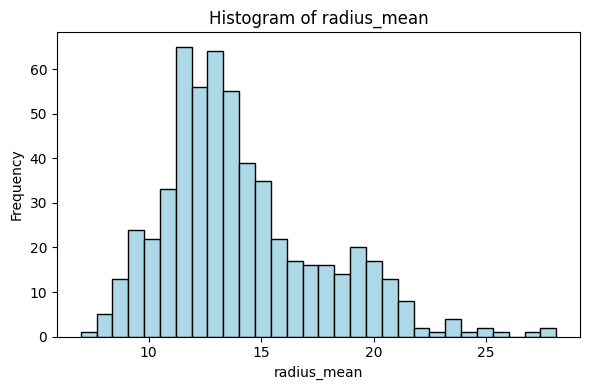

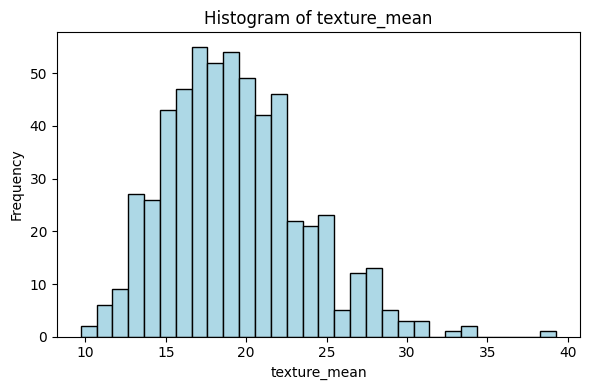

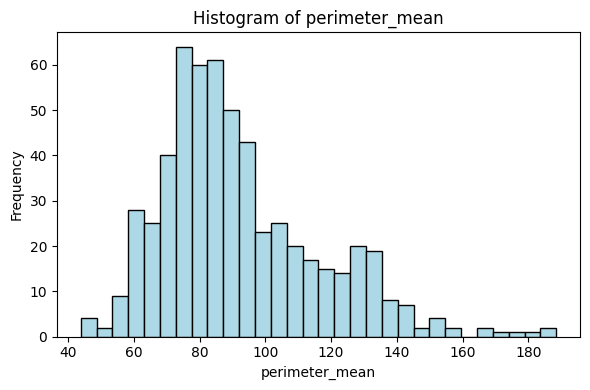

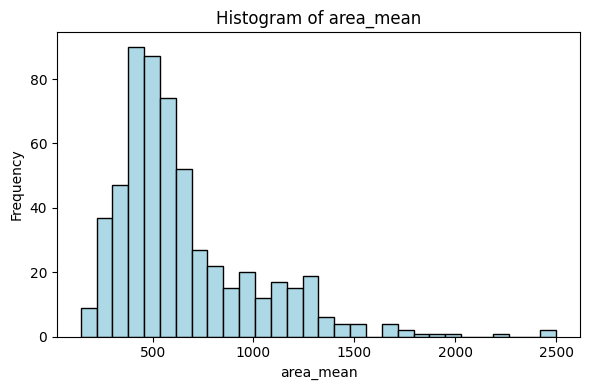

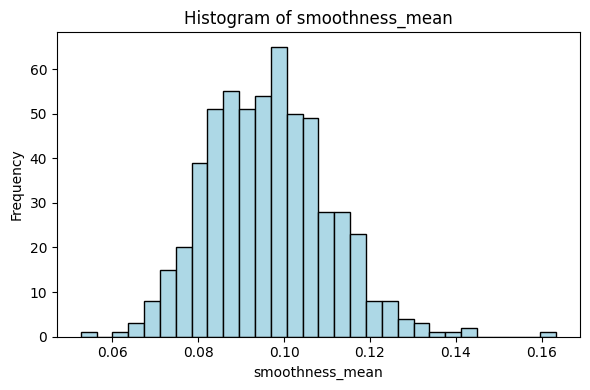

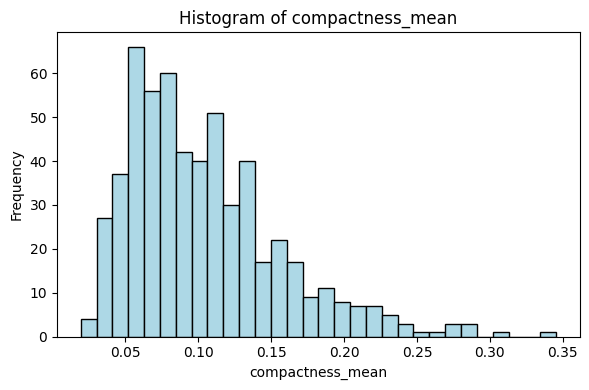

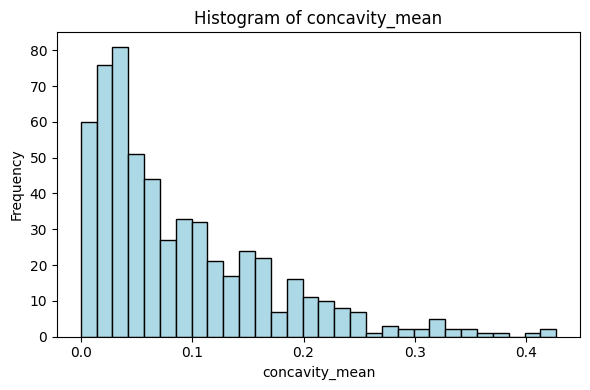

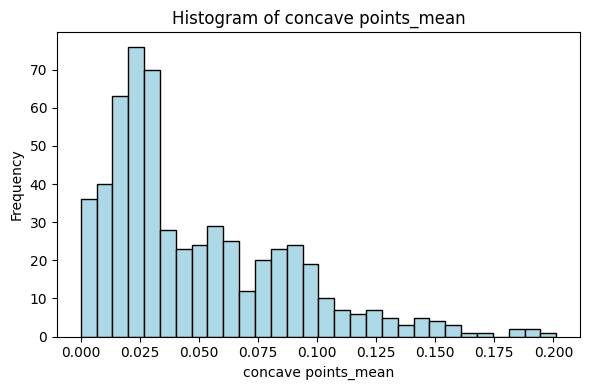

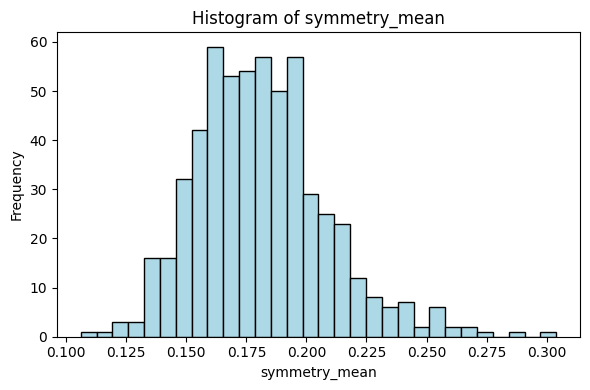

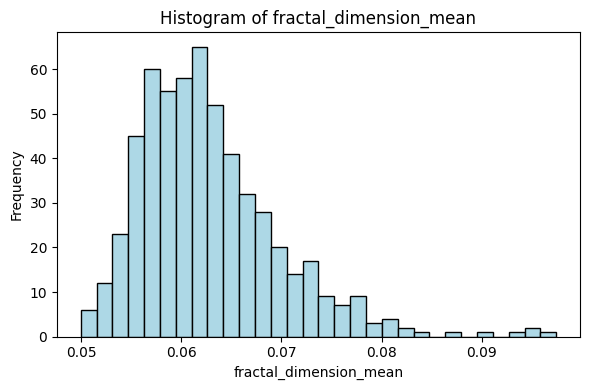

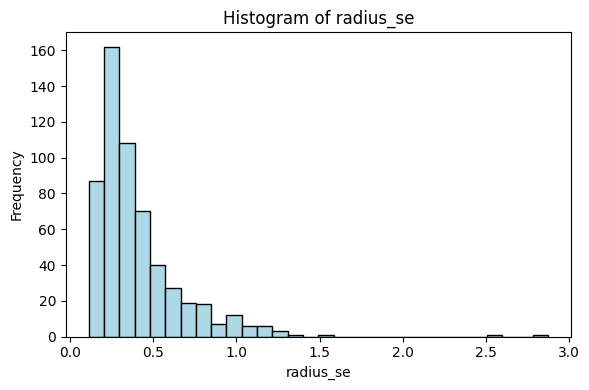

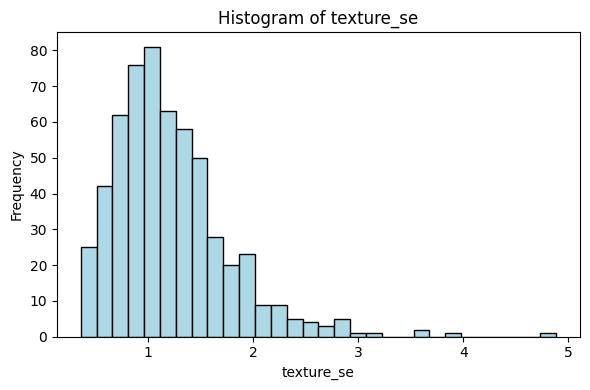

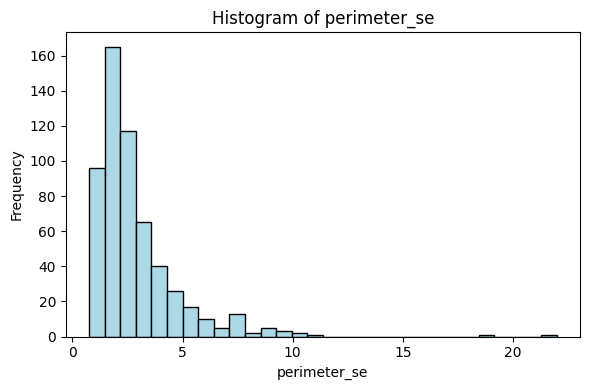

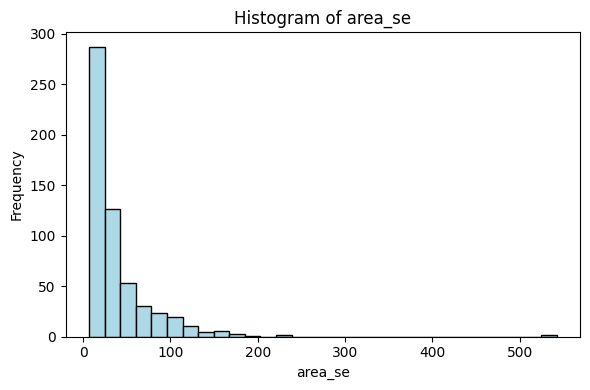

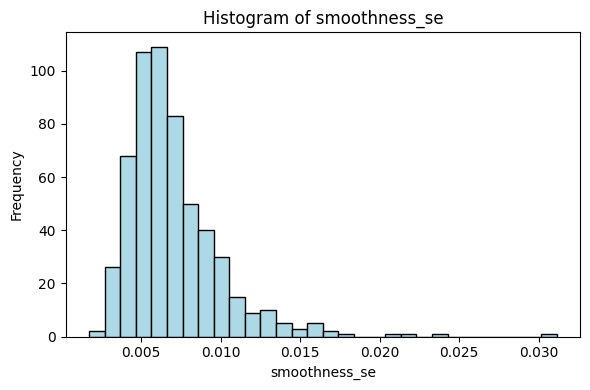

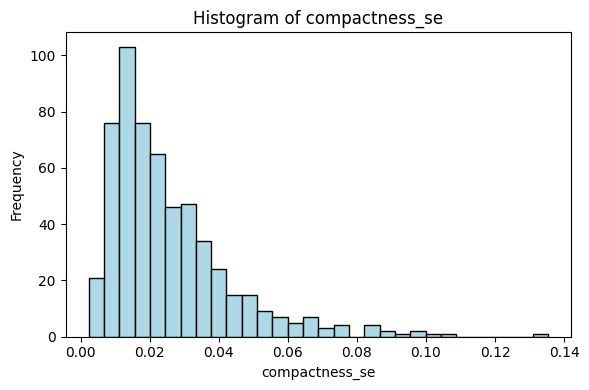

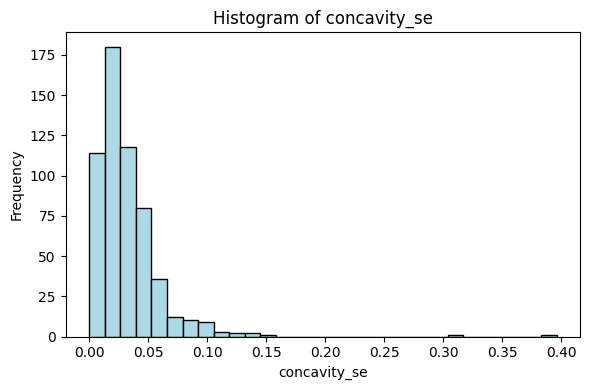

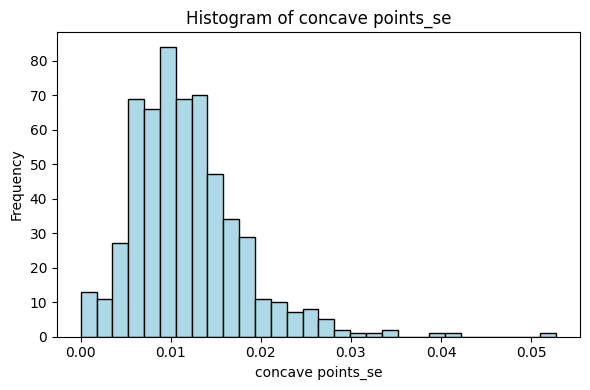

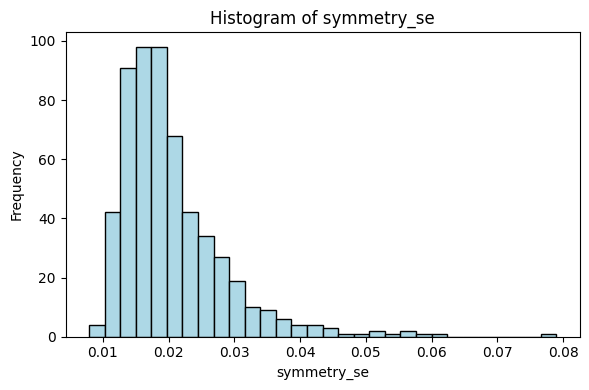

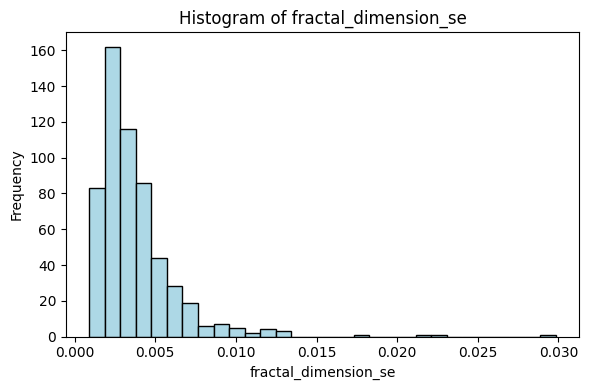

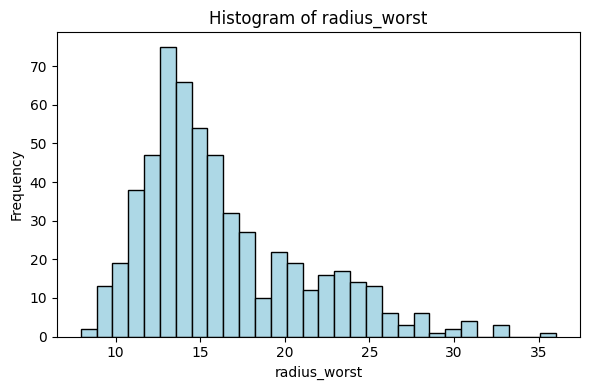

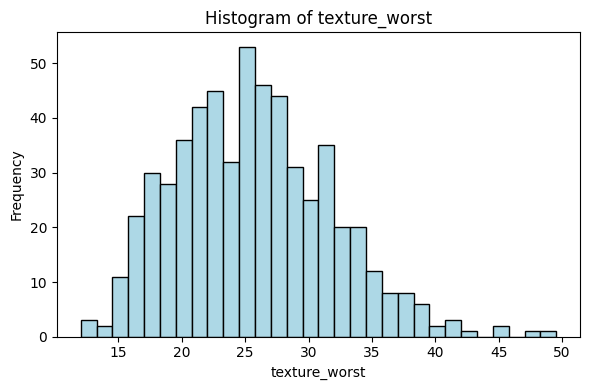

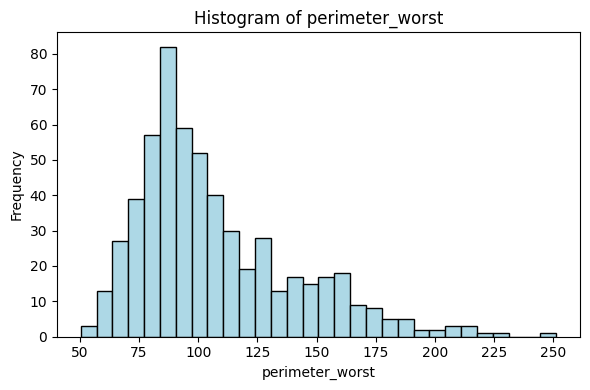

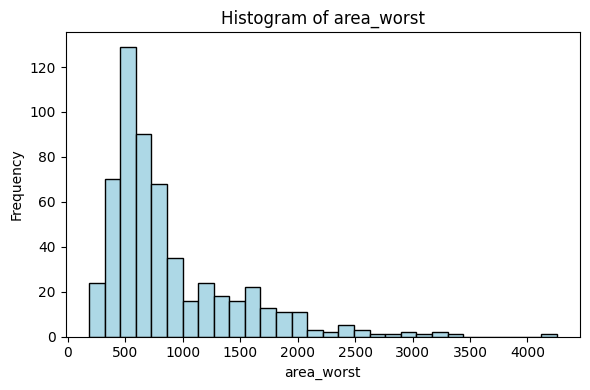

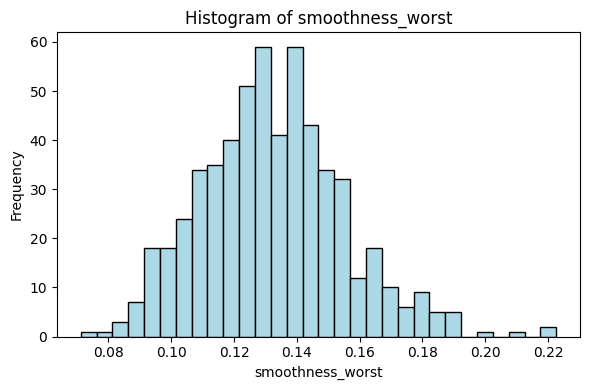

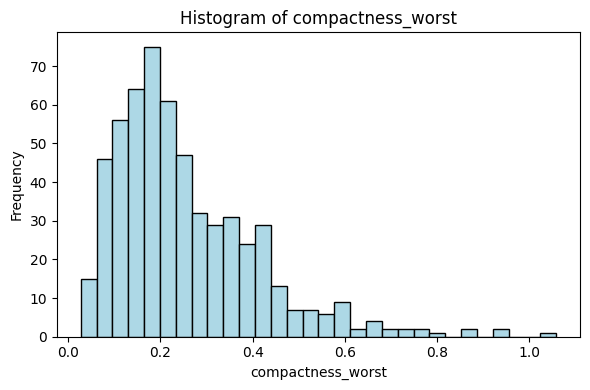

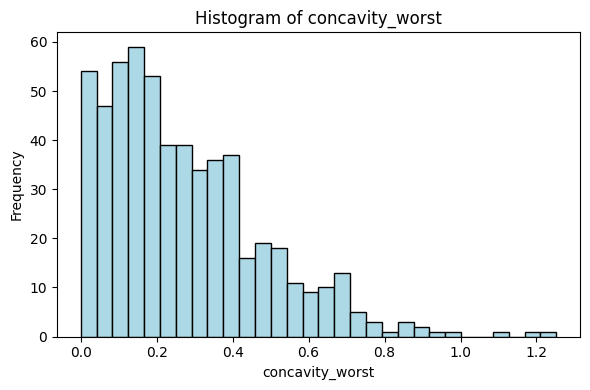

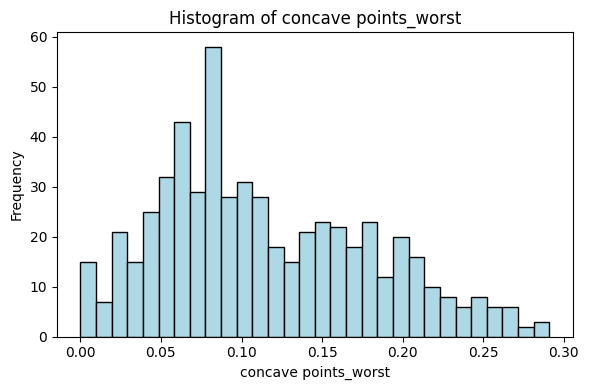

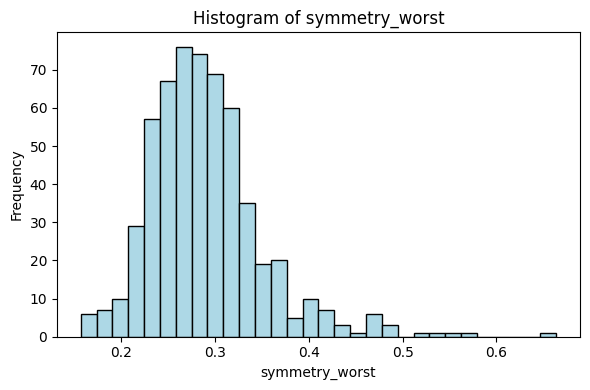

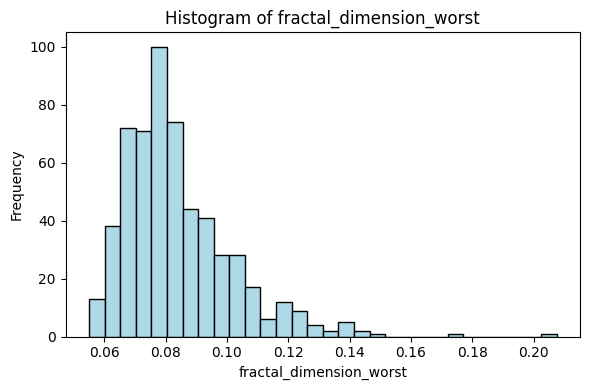

In [17]:
# Step 7: Plot histograms for numerical columns
for col in numerical_columns:
    if col != "diagnosis":
        plt.figure(figsize=(6, 4))
        plt.hist(df[col], bins=30, color="lightblue", edgecolor="black")
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

In [18]:
# Step 8: Encode target variable BEFORE correlation
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])  # M=1, B=0

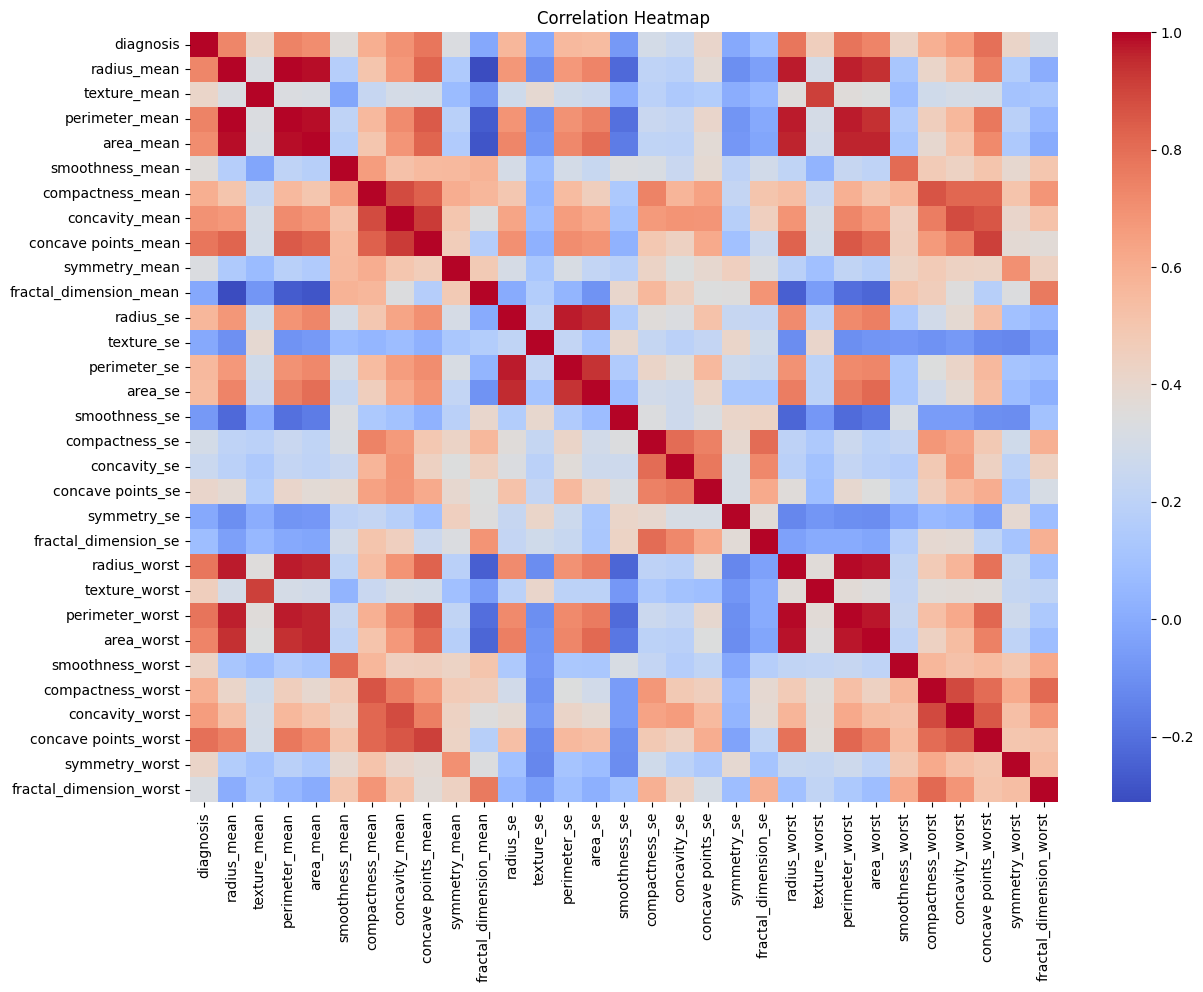

In [19]:
# Step 9: Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# Step 10: Define features and target variable
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [21]:
# Step 11: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Step 12: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [23]:
# Step 13: Fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
# Step 14: Evaluate model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Accuracy Score: 0.9736842105263158
Precision Score: 0.9761904761904762
Recall Score: 0.9534883720930233
ROC AUC Score: 0.9697019325253848


In [25]:
# Step 15: ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

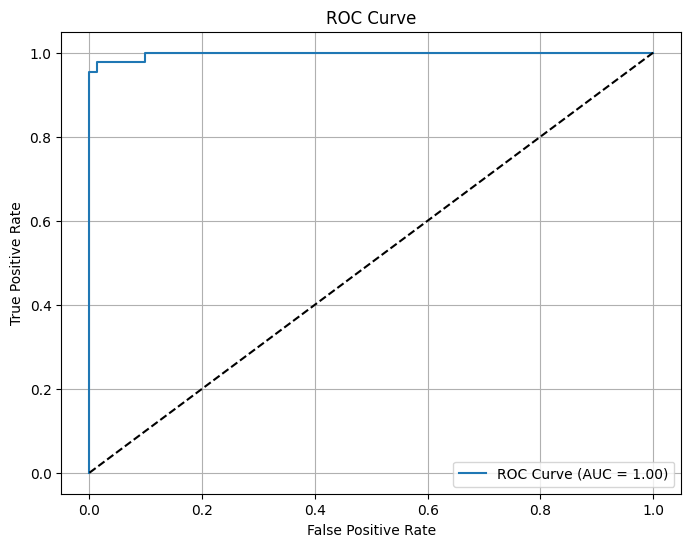

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_probs):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [27]:
# Step 16: Threshold tuning
custom_threshold = 0.3
y_custom_pred = (y_probs >= custom_threshold).astype(int)

In [28]:
print(f"\nConfusion Matrix with threshold = {custom_threshold}")
print(confusion_matrix(y_test, y_custom_pred))
print("Precision:", precision_score(y_test, y_custom_pred))
print("Recall:", recall_score(y_test, y_custom_pred))


Confusion Matrix with threshold = 0.3
[[67  4]
 [ 1 42]]
Precision: 0.9130434782608695
Recall: 0.9767441860465116


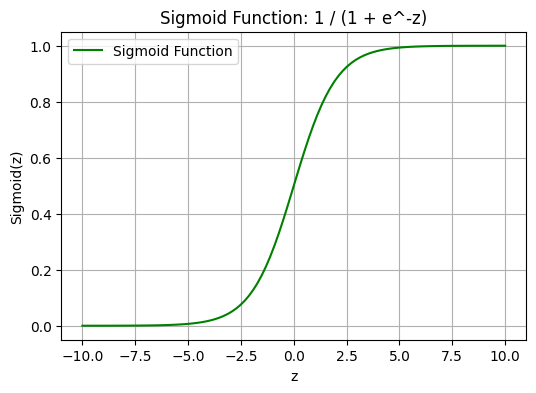

In [29]:
# Step 17: Explain Sigmoid Function
x_vals = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x_vals))

plt.figure(figsize=(6, 4))
plt.plot(x_vals, sigmoid, label="Sigmoid Function", color="green")
plt.title("Sigmoid Function: 1 / (1 + e^-z)")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.legend()
plt.show()